# Univariate Analysis
Analyze the distribution of individual features. \
Include histograms, box plots, or other appropriate visualizations.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uni_data = pd.read_csv('../data/regional_univariate_data.csv', index_col=0)
uni_data = uni_data.loc['2020-01-22':'2022-09-15']

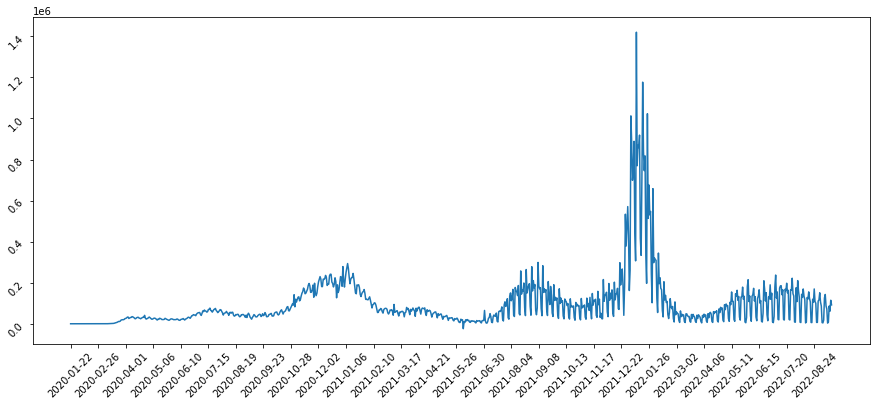

In [3]:
# time series plot
summed_data = uni_data.reset_index().groupby('date').sum()
plt.figure(figsize=(15, 6))
plt.tick_params(rotation=45)
plt.plot(summed_data)

gap = 35
plt.xticks(range(0, len(summed_data), gap), summed_data.index[::gap])
plt.show()

<AxesSubplot:ylabel='Count'>

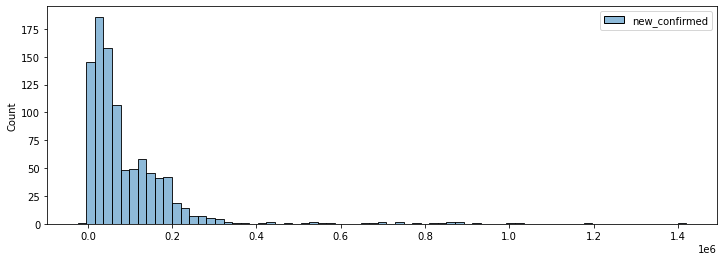

In [4]:
# density of the response variable
plt.figure(figsize=(12, 4))
sns.histplot(summed_data, kde=False)

<AxesSubplot:>

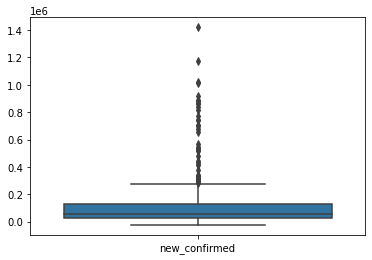

In [5]:
# boxplot of the response variable
plt.figure(figsize=(6, 4))
sns.boxplot(data=summed_data)

<AxesSubplot:title={'center':'New Confirmed Cases by Season'}, xlabel='season', ylabel='new_confirmed'>

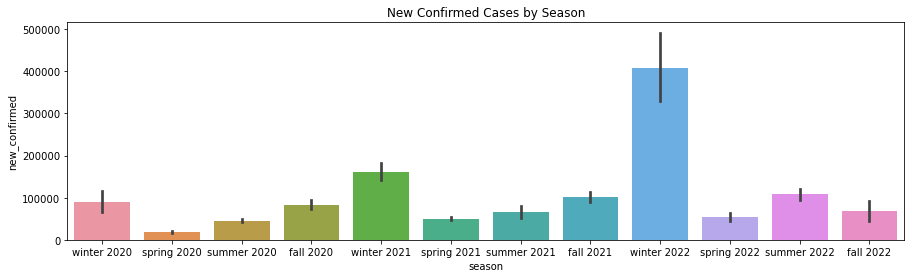

In [9]:
# explore seasonal
plt.figure(figsize=(15, 4)) 
plt.title('New Confirmed Cases by Season')
summed_data.index = pd.to_datetime(summed_data.index)
def get_season(date):
    month = date.month
    year = date.year
    if month in [12, 1, 2]:
        return f'winter {year}'
    elif month in [3, 4, 5]:
        return f'spring {year}'
    elif month in [6, 7, 8]:
        return f'summer {year}'
    else:
        return f'fall {year}'
    
summed_data['season'] = summed_data.index.map(get_season)
sns.barplot(x='season', y='new_confirmed', data=summed_data)

In [10]:
# summary statistics of the response variable
summed_data.describe().round().astype(str)

,new_confirmed
count,968.0
mean,97145.0
std,135739.0
min,-24112.0
25%,26767.0
50%,56620.0
75%,128610.0
max,1420398.0


## Univariate analysis on features  

In [6]:
multi_data = pd.read_csv('../data/regional_multivariate_data.csv')

In [7]:
# spans from 2021-01-12 to 2022-07-15
multi_data.date.min(), multi_data.date.max()

('2021-01-12', '2022-07-15')

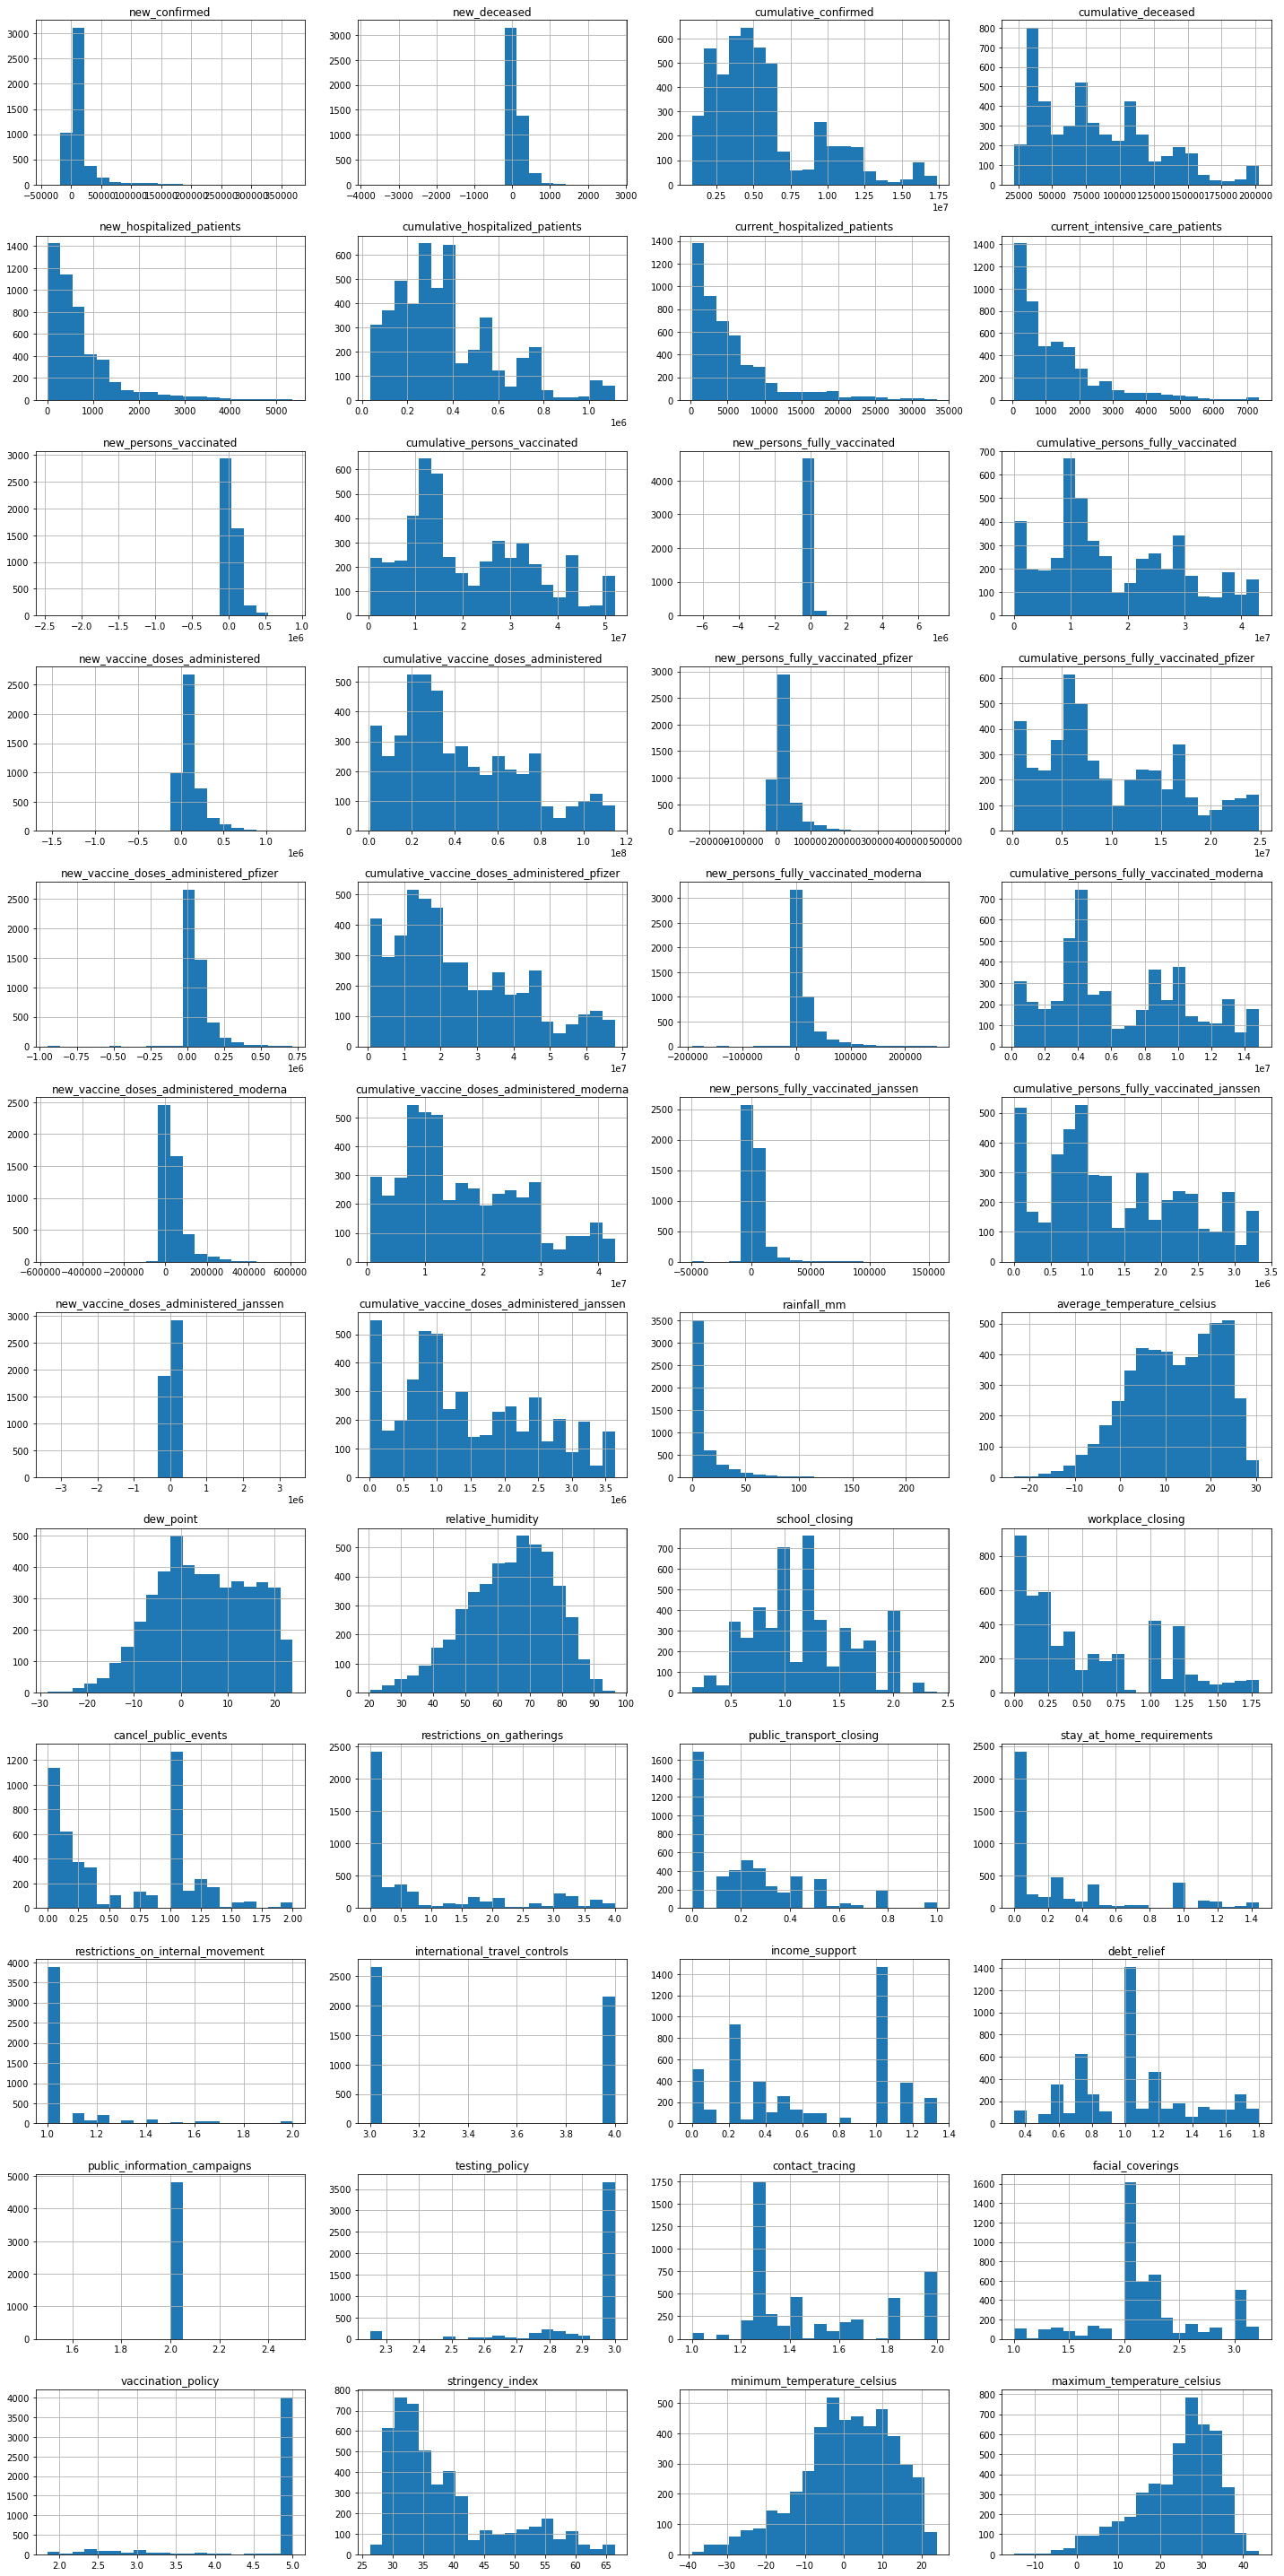

In [8]:
# histograms of every variable 
multi_data['date'] = pd.to_datetime(multi_data['date'])
hist_data = multi_data.iloc[:, 2:52]
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(20, 40))
axes = axes.ravel()
for i, col in enumerate(hist_data.columns):
    hist_data[col].hist(ax=axes[i], bins = 20)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

can easily spot the categorical variables from these histograms and find those cateogircal that are skewed and have little to no variation 
like _public information campaigns_ and vccination poloy

In [9]:
multi_data['public_information_campaigns'].value_counts()

2.0    4811
Name: public_information_campaigns, dtype: int64

In [13]:
multi_data['new_persons_fully_vaccinated'].value_counts()

0.0        589
6723.0       3
9661.0       3
3640.0       3
7895.0       3
          ... 
5330.0       1
22097.0      1
23429.0      1
42938.0      1
23496.0      1
Name: new_persons_fully_vaccinated, Length: 4116, dtype: int64